In [163]:
# importing the required libraries
import pandas as pd
import numpy as np
# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [164]:
# Reading the datasets
df= pd.read_csv('COVID19INDIA.csv')
df_india = df.copy()
df

,S. No.,Name of State / UT,Total Confirmed cases*,Cured/Discharged/Migrated,Deaths**
0,1.0,Andaman and Nicobar Islands,33,33.0,0.0
1,2.0,Andhra Pradesh,2709,1763.0,55.0
2,3.0,Arunachal Pradesh,1,1.0,0.0
3,4.0,Assam,259,54.0,4.0
4,5.0,Bihar,2177,629.0,11.0
5,6.0,Chandigarh,218,178.0,3.0
6,7.0,Chhattisgarh,172,62.0,0.0
7,8.0,Dadar Nagar Haveli,1,0.0,0.0
8,9.0,Delhi,12319,5897.0,208.0
9,10.0,Goa,54,16.0,0.0


In [165]:
# Coordinates of India States and Union Territories
India_coord = pd.read_excel('Indian Coordinates.xlsx')


In [166]:
df['Total cases'] = df['Total Confirmed cases*']  
total_cases = df['Total Confirmed cases*'].sum()
print('Total number of confirmed COVID 2019 cases across India till date (22nd March, 2020):', total_cases)
total_cases

Total number of confirmed COVID 2019 cases across India till date (22nd March, 2020): 125101


125101

In [167]:
df.style.background_gradient(cmap='Reds')

,S. No.,Name of State / UT,Total Confirmed cases*,Cured/Discharged/Migrated,Deaths**,Total cases
0,1.000000,Andaman and Nicobar Islands,33,33.000000,0.000000,33
1,2.000000,Andhra Pradesh,2709,1763.000000,55.000000,2709
2,3.000000,Arunachal Pradesh,1,1.000000,0.000000,1
3,4.000000,Assam,259,54.000000,4.000000,259
4,5.000000,Bihar,2177,629.000000,11.000000,2177
5,6.000000,Chandigarh,218,178.000000,3.000000,218
6,7.000000,Chhattisgarh,172,62.000000,0.000000,172
7,8.000000,Dadar Nagar Haveli,1,0.000000,0.000000,1
8,9.000000,Delhi,12319,5897.000000,208.000000,12319
9,10.000000,Goa,54,16.000000,0.000000,54


In [168]:
#Total Active  is the Total cases - (Number of death + Cured)


df['Total Active'] = df['Total cases'] - (df['Deaths**'] + df['Cured/Discharged/Migrated'])
total_active = df['Total Active'].sum()
print('Total number of active COVID 2019 cases across India:', total_active)
Tot_Cases = df.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total number of active COVID 2019 cases across India: 67698.0


,Total Active
Name of State / UT,
Maharashtra,30482.000000
Tamil Nadu,7527.000000
Gujarat,6586.000000
Delhi,6214.000000
Madhya Pradesh,2809.000000
Rajasthan,2661.000000
Uttar Pradesh,2345.000000
West Bengal,1846.000000
Bihar,1537.000000


In [181]:
# Learn how to use folium to create a zoomable map
df_full = pd.merge(India_coord,df,on='Name of State / UT')
map = folium.Map(location=[20,70], zoom_start=4,tiles='Stamenterrain')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Total cases'], df_full['Name of State / UT']):
    folium.CircleMarker([lat, lon], radius=value*0.003, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.1).add_to(map)
map

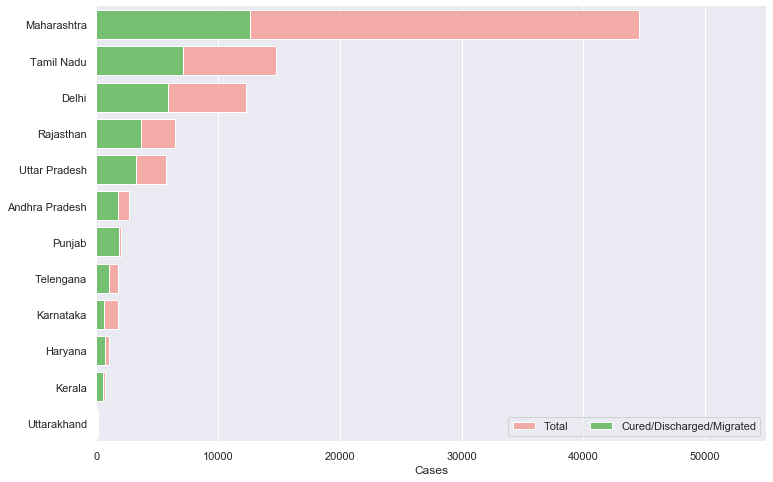

In [170]:
#Learn how to use Seaborn for visualization
f, ax = plt.subplots(figsize=(12, 8))
data = df_full[['Name of State / UT','Total cases','Cured/Discharged/Migrated','Deaths**']]
data.sort_values('Total cases',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total cases", y="Name of State / UT", data=data,label="Total", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Cured/Discharged/Migrated", y="Name of State / UT", data=data, label="Cured/Discharged/Migrated", color="g")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 55000), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)

In [150]:
df = pd.read_csv('covid_19_clean_complete2.csv',parse_dates=['Date'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

df_confirmed = pd.read_csv("time_series_covid19_confirmed_global.csv")
df_recovered = pd.read_csv("time_series_covid19_recovered_global.csv")
df_deaths = pd.read_csv("time_series_covid19_deaths_global(1).csv")

df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

In [151]:
df_deaths.head()
df_confirmed.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,916,933,946,948,949,964,969,981,989,998
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,761,761,761,761,761,762,762,762,762,762
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,48,48,48,50,52,52,58,60,61,69


In [152]:
df2 = df.groupby(["Date", "Country", "Province/State"])[['Date', 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
df2.head()

,Date,Country,Province/State,Confirmed,Deaths,Recovered
0,2020-01-22,Australia,Australian Capital Territory,0,0,0
1,2020-01-22,Australia,New South Wales,0,0,0
2,2020-01-22,Australia,Northern Territory,0,0,0
3,2020-01-22,Australia,Queensland,0,0,0
4,2020-01-22,Australia,South Australia,0,0,0


In [153]:
# Check for India's data
india_cases=df.query('Country=="India"').groupby("Date")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
india_cases

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,0,0,0
1,2020-01-23,0,0,0
2,2020-01-24,0,0,0
3,2020-01-25,0,0,0
4,2020-01-26,0,0,0
...,...,...,...,...
116,2020-05-17,95698,3025,36795
117,2020-05-18,100328,3156,39233
118,2020-05-19,106475,3302,42309
119,2020-05-20,112028,3434,45422


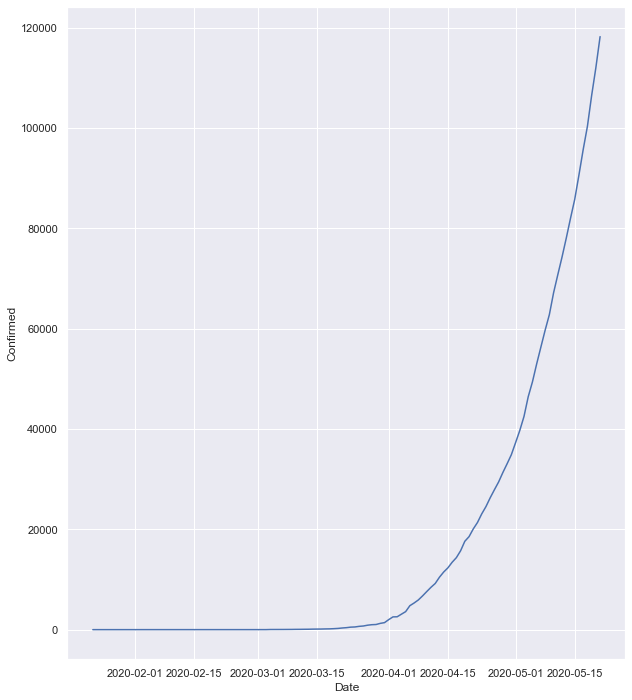

In [154]:

sns.lineplot(x='Date',y='Confirmed',data=india_cases)
plt.grid(True)
plt.show()

In [155]:
china=df[(df["Country"]=="China")]

In [156]:
china

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
49,Anhui,China,31.8257,117.2264,2020-01-22,1,0,0
50,Beijing,China,40.1824,116.4142,2020-01-22,14,0,0
51,Chongqing,China,30.0572,107.8740,2020-01-22,6,0,0
52,Fujian,China,26.0789,117.9874,2020-01-22,1,0,0
53,Gansu,China,37.8099,101.0583,2020-01-22,0,0,0
...,...,...,...,...,...,...,...,...
31877,Tianjin,China,39.3054,117.3230,2020-05-21,192,3,187
31878,Tibet,China,31.6927,88.0924,2020-05-21,1,0,1
31879,Xinjiang,China,41.1129,85.2401,2020-05-21,76,3,73
31880,Yunnan,China,24.9740,101.4870,2020-05-21,185,2,0


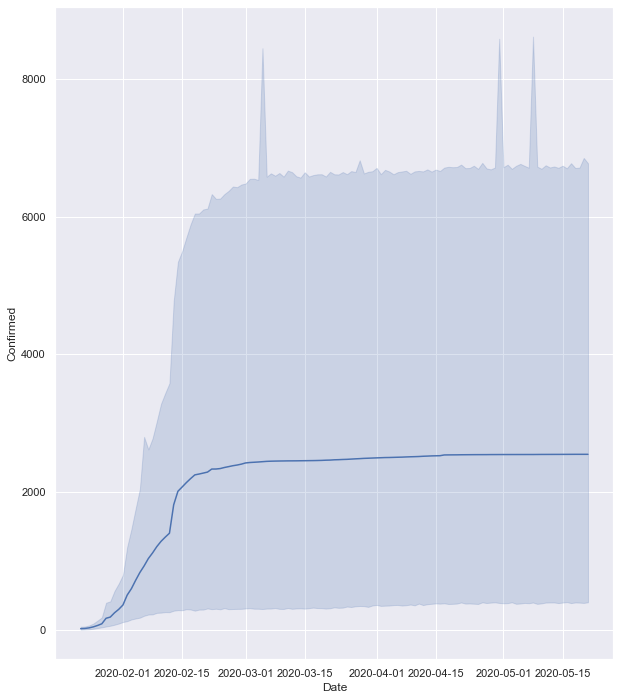

In [157]:
sns.lineplot(x='Date',y='Confirmed',data=(china))
plt.grid(True)
plt.show()

In [158]:
india_china=df.loc[(df["Country"]=="China")|(df["Country"].isin(["India"]))]

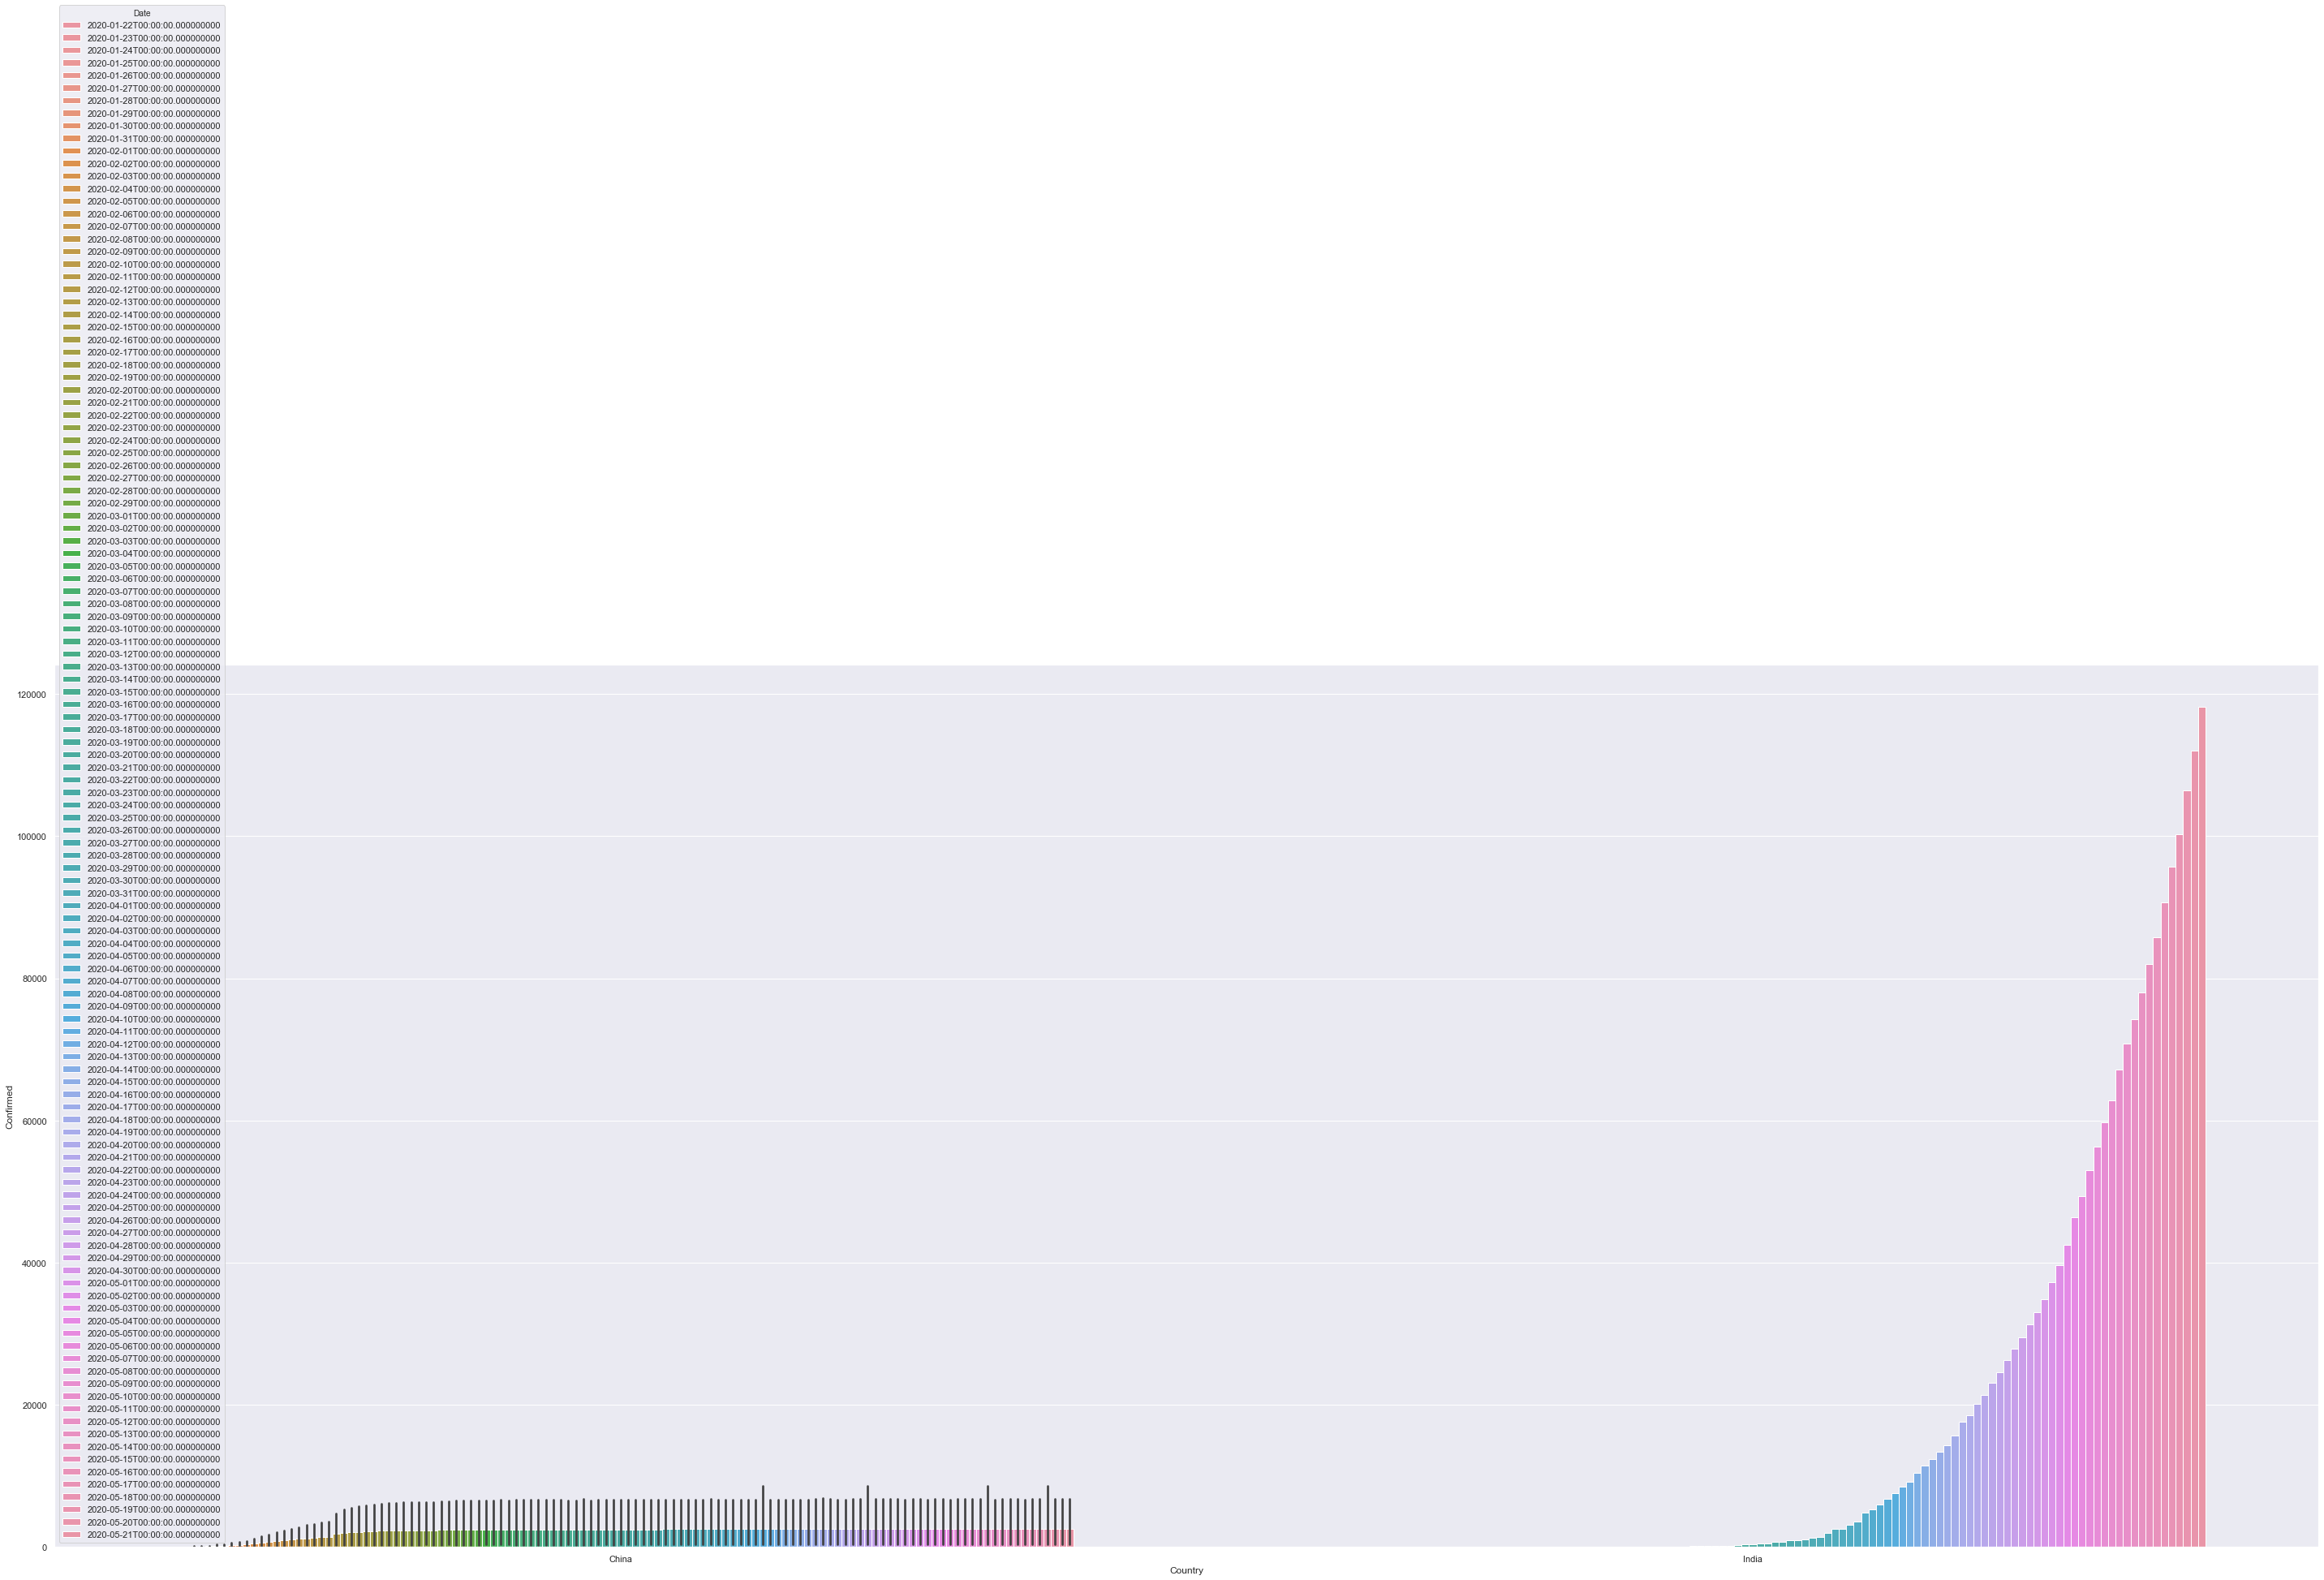

In [159]:
sns.set(rc={'figure.figsize':(50,20)})
sns.barplot(x="Country",y="Confirmed",data=india_china,hue="Date")
plt.show()

In [160]:
from fbprophet import Prophet

In [128]:
confirmed = india_cases.groupby('Date').sum()['Confirmed'].reset_index()
deaths = india_cases.groupby('Date').sum()['Deaths'].reset_index()
recovered = india_cases.groupby('Date').sum()['Recovered'].reset_index()

In [129]:
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [130]:
confirmed.tail()

,ds,y
116,2020-05-17,95698
117,2020-05-18,100328
118,2020-05-19,106475
119,2020-05-20,112028
120,2020-05-21,118226


In [131]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=16)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
132,2020-06-02
133,2020-06-03
134,2020-06-04
135,2020-06-05
136,2020-06-06


In [132]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
132,2020-06-02,148655.763524,142657.206508,153957.022455
133,2020-06-03,152128.973429,145663.884436,158148.785357
134,2020-06-04,155675.589653,149504.081769,161501.380056
135,2020-06-05,158451.126584,151214.323179,165578.974403
136,2020-06-06,161921.509724,154698.241013,169709.297392


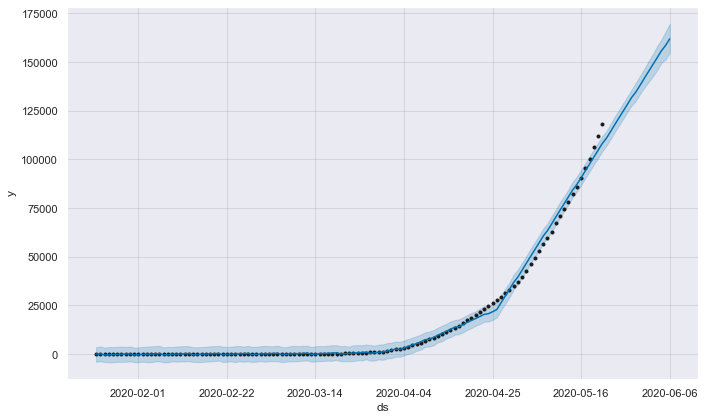

In [133]:
confirmed_forecast_plot = m.plot(forecast)

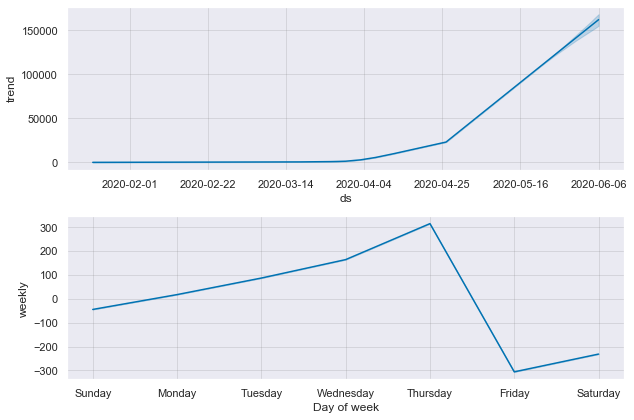

In [134]:
confirmed_forecast_plot =m.plot_components(forecast)

In [135]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [136]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=16)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
132,2020-06-02
133,2020-06-03
134,2020-06-04
135,2020-06-05
136,2020-06-06


In [137]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
132,2020-06-02,4701.073253,4559.901403,4871.039335
133,2020-06-03,4807.086836,4645.965027,4981.378842
134,2020-06-04,4915.869909,4739.717190,5117.438814
135,2020-06-05,5010.590901,4809.313432,5233.082637
136,2020-06-06,5118.512764,4917.496379,5351.600068


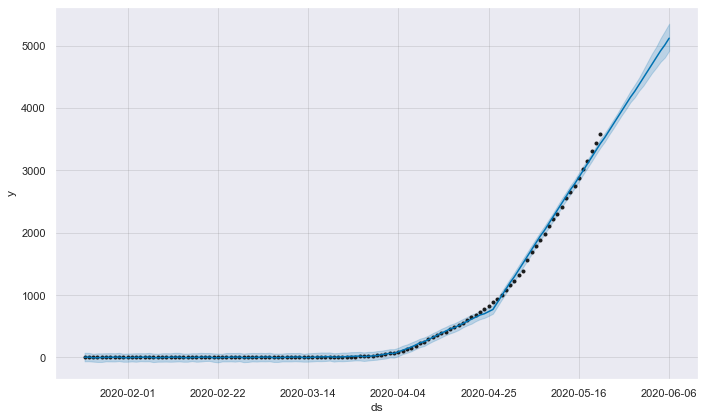

In [138]:
deaths_forecast_plot = m.plot(forecast)

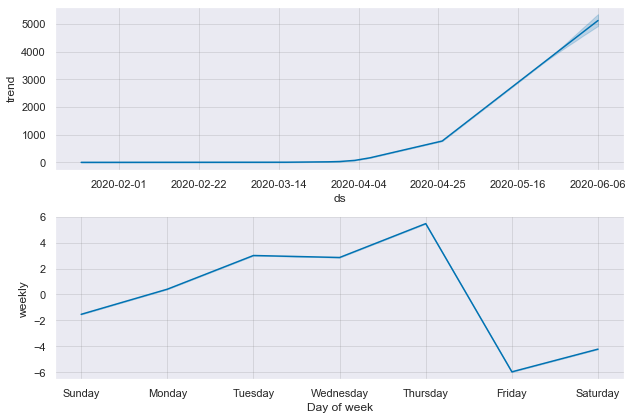

In [139]:
deaths_forecast_plot = m.plot_components(forecast)